<a href="https://colab.research.google.com/github/Vishesh2001/EDA-of-IPL/blob/main/ipl_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install fsspec
import fsspec

     |████████████████████████████████| 132 kB 5.3 MB/s 


importing ipl data set 


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data=pd.read_csv("ipldataset.csv")
data.head(6)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN


In [ ]:
data.shape

(636, 18)

In [ ]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


number of matches played?


In [ ]:
data['id'].count()

636

number of ipl seasons?


In [ ]:
data["season"].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

which ipl team won by scoring max runs?


In [ ]:
data.iloc[data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

which ipl team won by taking max wickets?

In [ ]:
data.iloc[data['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

which ipl team won by taking min wickets?


In [ ]:
data.iloc[data['win_by_wickets'].idxmin()]

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

maximum number of matches in a season?

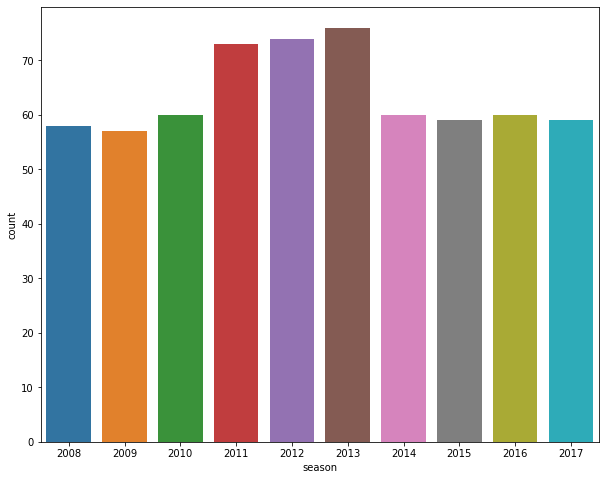

In [ ]:
fig_dimns=(10,8)
fig, ax=plt.subplots(figsize=fig_dimns)
sns.countplot(x='season',ax=ax,data=data)
plt.show()

which is the most sucessful team according to this dataset?


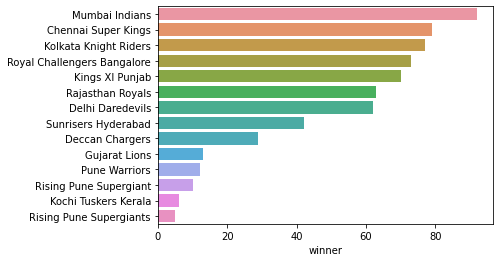

In [ ]:
sucess=data.winner.value_counts()
sns.barplot(y=sucess.index,x=sucess)

what is the probability of winning a match if the toss was won?

In [ ]:
win_probability=data["toss_winner"]==data["winner"]
win_probability.groupby(win_probability).size()


False    311
True     325
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


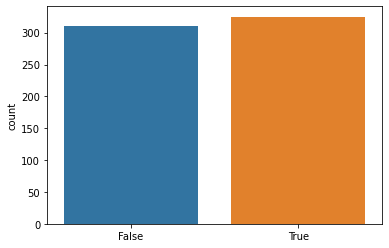

In [ ]:
sns.countplot(win_probability)

highest wins by teams per season


In [ ]:
data.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: winner, Length: 84, dtype: int64

In [ ]:
data["toss_decision"].value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

man of the match-highest to lowest(in won matches)

In [ ]:
data["player_of_match"].value_counts()

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
                  ..
TM Dilshan         1
LR Shukla          1
MA Starc           1
SA Asnodkar        1
S Anirudha         1
Name: player_of_match, Length: 201, dtype: int64

in which city were the number of matches played.

In [ ]:
data["city"].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Port Elizabeth     7
Abu Dhabi          7
Cape Town          7
Cuttack            7
Ranchi             7
Sharjah            6
Raipur             6
Indore             5
Kochi              5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64